In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [5]:
num_fils = 309
num_steps = 500

# --- File Paths ---
# Make sure to use the correct simulation data path
initial_k38 = '../data/emergent_initial_wave_k38/20250724/ciliate_309fil_18000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'
initial_synch = '../data/emergent_initial_wave_k0/20250724/ciliate_309fil_18000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

# --- Load Data ---
k38_data = np.loadtxt(initial_k38)
synch_data = np.loadtxt(initial_synch)

In [6]:
# --- Process Data ---
time_k38 = k38_data[:, 0] / num_steps
phases_k38 = np.mod(k38_data[:, 2:num_fils+2], 2*np.pi)

time_synch = synch_data[:, 0] / num_steps
phases_synch = np.mod(synch_data[:, 2:num_fils+2], 2*np.pi)

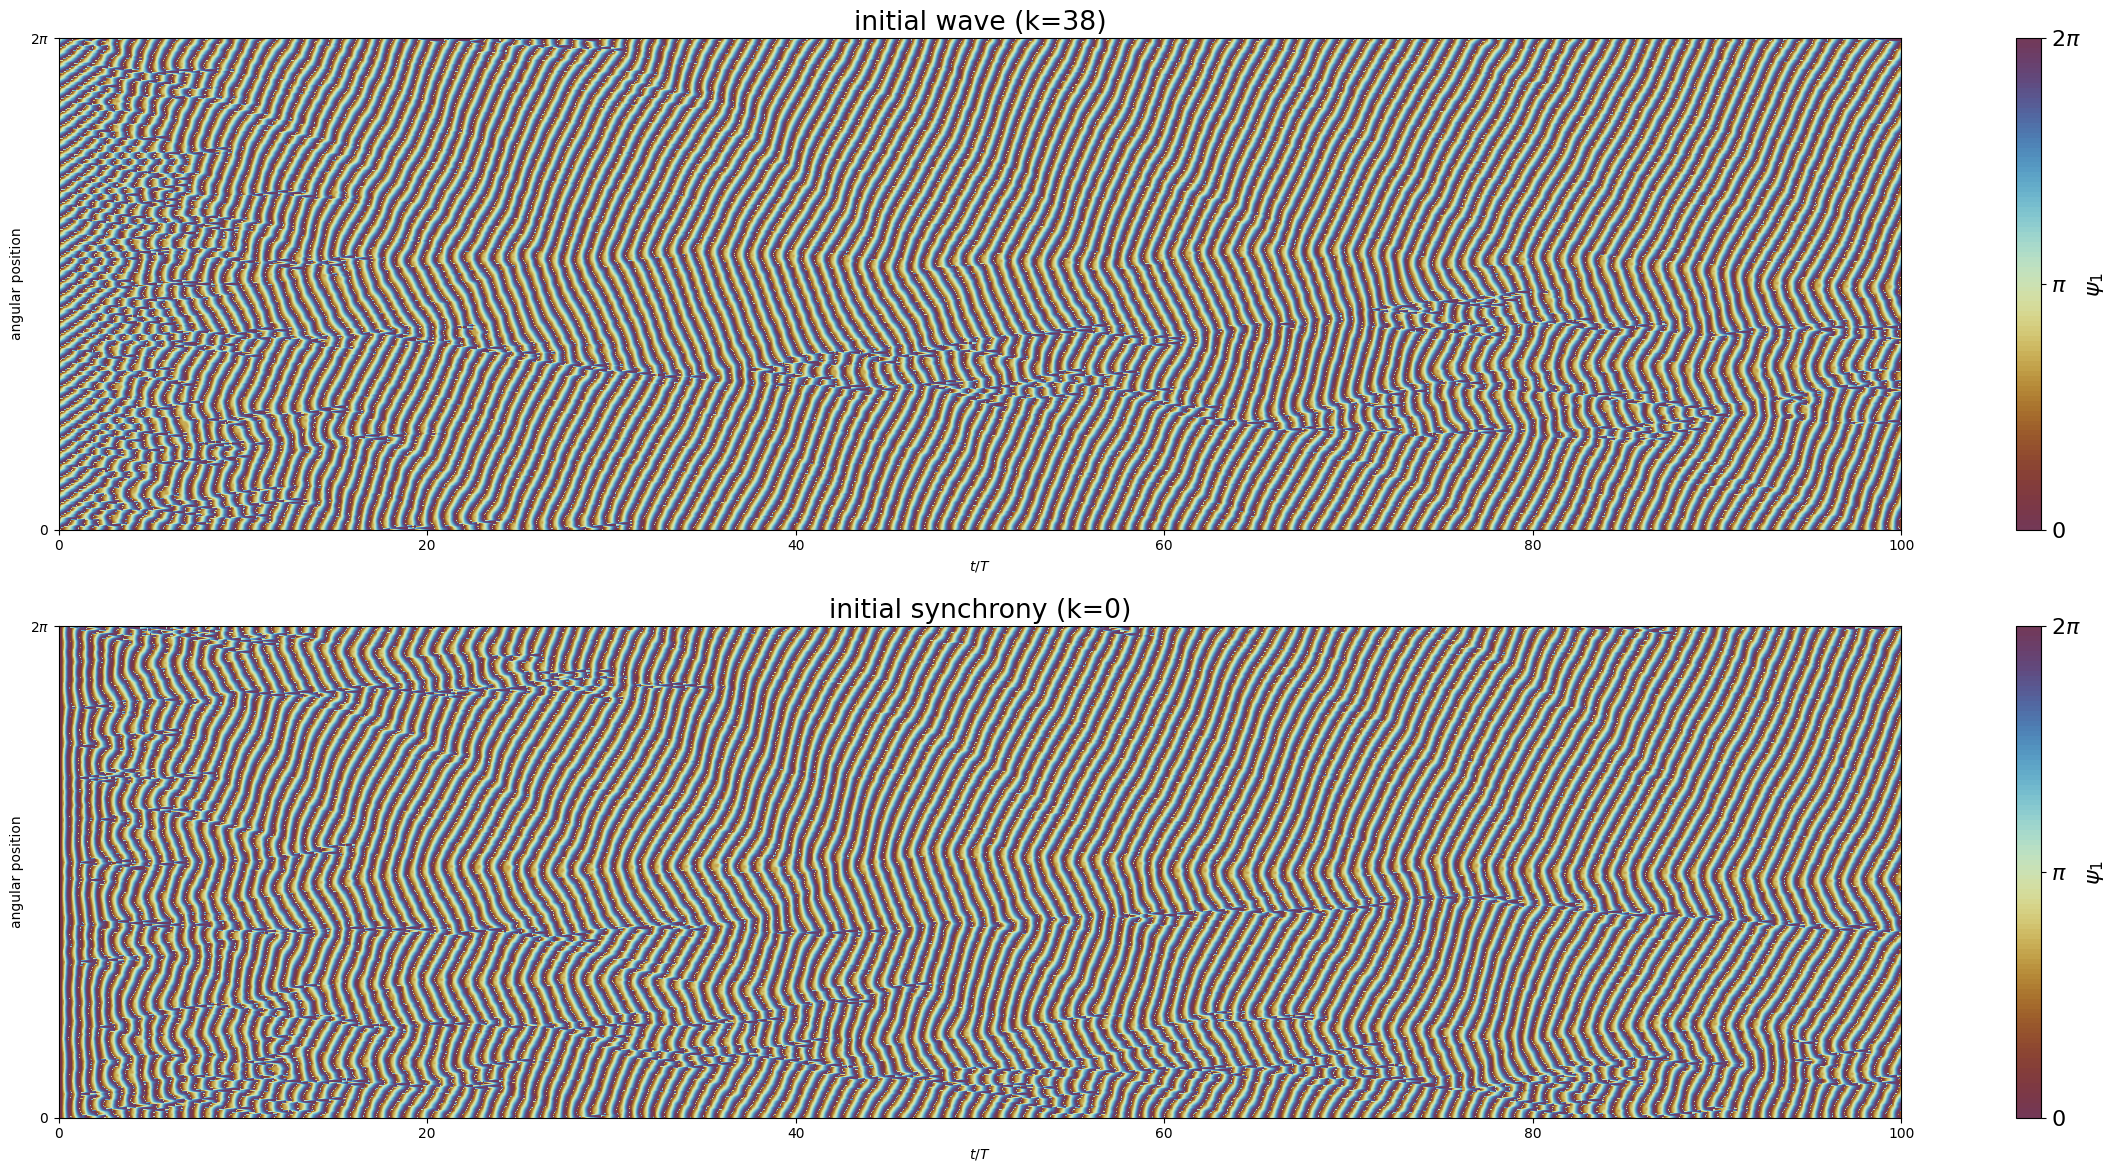

In [8]:
# --- Create Kymograph ---
fig, axes = plt.subplots(2,1, figsize=(24, 12), squeeze=False)
plt.rcParams.update({"font.size": 16})

# --- K38 Kymograph ---
ax = axes[0, 0]
position = np.linspace(0, 2*np.pi, num_fils)
xx, yy = np.meshgrid(time_k38, position)
im = ax.contourf(xx, yy, phases_k38.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$\psi_1$')
cbar.set_ticks([0, np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$\pi$', r'$2\pi$'])

ax.set_xlabel(r'$t/T$')
ax.set_ylabel('angular position')
ax.set_title('initial wave (k=38)')
ax.set_yticks([0, 2*np.pi])
ax.set_yticklabels([r'$0$', r'$2\pi$'])

# --- Synchronized Kymograph ---
ax = axes[1, 0]
position = np.linspace(0, 2*np.pi, num_fils)
xx, yy = np.meshgrid(time_synch, position)
im = ax.contourf(xx, yy, phases_synch.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$\psi_1$')
cbar.set_ticks([0, np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$\pi$', r'$2\pi$'])

ax.set_xlabel(r'$t/T$')
ax.set_ylabel('angular position')
ax.set_title('initial synchrony (k=0)')
ax.set_yticks([0, 2*np.pi])
ax.set_yticklabels([r'$0$', r'$2\pi$'])

plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)